<a href="https://colab.research.google.com/github/ptran1203/pytorch-animeGAN/blob/master/notebooks/animeGAN_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import output
import torch

repo = "Pytorch-animeGAN"
%cd "/content"
!rm -rf {repo}
!git clone https://github.com/ptran1203/{repo}
%cd {repo}
output.clear()

In [2]:
from inference import Transformer
transformer = Transformer('hayao')  

Weight loaded, ready to predict


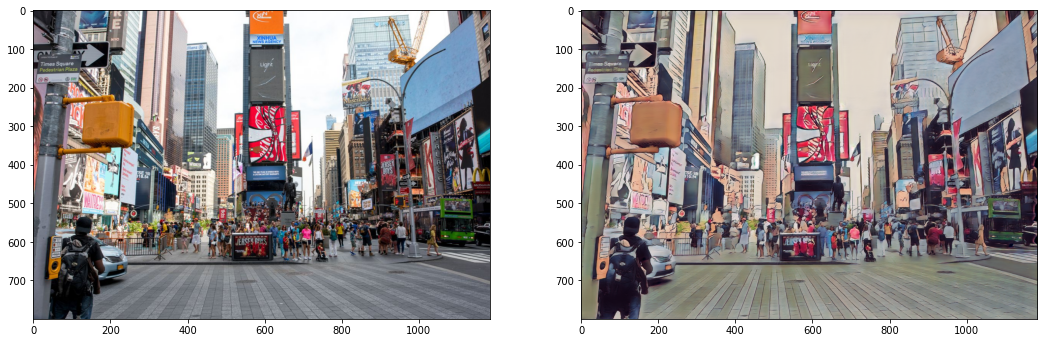

In [3]:
import cv2
import random
import matplotlib.pyplot as plt
import os
import numpy as np
from utils import read_image, resize_image

def random_img(img_dir):
    files = [f for f in os.listdir(img_dir) if 'anime' not in f]
    p = os.path.join(img_dir, random.choice(files))
    return resize_image(read_image(p), width=612)

# image = random_img('./example/result')
url = 'https://cdn.vox-cdn.com/thumbor/gU6znSoxGS1oNf9XCxy0xBMxFiU=/0x0:6949x4638/1200x800/filters:focal(2920x1764:4030x2874)/cdn.vox-cdn.com/uploads/chorus_image/image/59204015/shutterstock_536517334.0.jpg'
image = resize_image(read_image(url))

anime_img = (transformer.transform(image) + 1) / 2

fig = plt.figure(figsize=(18, 25))
fig.add_subplot(1, 2, 1)
plt.imshow(image)
fig.add_subplot(1, 2, 2)
plt.imshow(anime_img[0])
plt.show()

In [6]:
!python3 inference_video.py --checkpoint hayao\
                        --src /content/trailer.mp4\
                        --dest /content/trailer_anime.mp4\
                        --batch-size 2

Weight loaded, ready to predict
Transfroming video /content/trailer.mp4, 4350 frames, size: [1280, 720]
4351it [48:23,  1.50it/s]
Animation video saved to /content/trailer_anime.mp4
